<a href="https://colab.research.google.com/github/Yashu112/Deep-Learning/blob/main/ANN/Batch_Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Batch Normalization


**Q1. Theory and Concepts:**
1. Explain the concept of batch normalization in the context of Artificial Neural Networks.

  Ans. Batch normalization is a technique used in artificial neural networks to improve the training and convergence of deep learning models. It was introduced to address the problem of internal covariate shift, which is the change in the distribution of the inputs to a layer during training. This shift can slow down training and make it difficult for deep networks to learn effectively. Batch normalization helps mitigate this issue by normalizing the inputs to each layer, making the training process more stable and accelerating convergence.

   The steps involved in batch normalization for a given feature are as follows:
   - Calculate the mean and standard deviation of the feature across the mini-batch.
   - Normalize the feature by subtracting the mean and dividing by the standard deviation.
   - Scale and shift the normalized feature using the gamma and beta parameters.
   - Finally, the result is passed as the input to the next layer in the network.

2. Describe the benefits of using batch normalization during training

  Ans. Batch normalization provides several advantages for training deep neural networks:
   - Faster convergence: It accelerates training by reducing the internal covariate shift and allowing for more significant learning rate settings.
   - Regularization effect: The normalization process can act as a form of regularization, reducing the risk of overfitting.
   - Improved generalization: Models trained with batch normalization tend to generalize better to unseen data.
   - Stability: It makes training more stable by mitigating issues like vanishing or exploding gradients.

3. Discuss the working principle of batch normalization, including the normalization step and the learnable
parameters.

  Ans. Batch normalization (BatchNorm) works by normalizing the inputs to each layer in a neural network during training. It addresses the problem of internal covariate shift, which is the change in the distribution of the inputs as the network trains. The key components of batch normalization are the normalization step and the learnable parameters.

  Here's how batch normalization works:

  1. **Normalization Step:**
   For each feature (neuron) in a layer, batch normalization calculates the mean and standard deviation of that feature across the current mini-batch of data. The mini-batch typically consists of a fixed number of examples (e.g., 32, 64, or 128). The mean (μ) and standard deviation (σ) are computed as follows:

   - **Mean (μ):** The mean of the feature across the mini-batch.
   - **Standard Deviation (σ):** The standard deviation of the feature across the mini-batch.

   Then, it normalizes the feature by subtracting the mean and dividing by the standard deviation. This ensures that the feature has a mean of approximately 0 and a standard deviation of approximately 1.

   `Normalized feature = (Feature - μ) / σ`

  2. **Learnable Parameters:**
   After the normalization step, batch normalization introduces two learnable parameters for each feature in the layer:

   - **Scaling Parameter (γ):** This parameter allows the network to adjust the scale of the normalized feature. It essentially allows the network to learn the appropriate scale for each feature, which can be important in feature representation.
   - **Shifting Parameter (β):** This parameter allows the network to adjust the shift of the normalized feature. It effectively allows the network to learn the optimal mean shift for each feature.

  The scaled and shifted normalized feature is computed as follows:

  `Scaled and Shifted Feature = γ * Normalized feature + β`

   During forward propagation, the normalized, scaled, and shifted feature is passed as input to the next layer. The parameters γ and β are updated during backpropagation as part of the training process.


**Q2. Impementation:**
1. Choose a dataset of your choice (e.g., MNIST, CIFAR-10) and preprocess it
2. Implement a simple feedforward neural network using any deep learning framework/library (e.g.,TensorFlow, PuTorch)
3. Train the neural network on the chosen dataset without using batch normalization
4. Implement batch normalization layers in the neural network and train the model again
5. Compare the training and validation performance (e.g., accuracy, loss) between the models with and
without batch normalization
6. Discuss the impact of batch normalization on the training process and the performance of the neural
network.


In [2]:
import tensorflow as tf

#importing the mnist data
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# create a validation data set from the full training data
# Scale the data between 0 to 1 by dividing it by 255
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.


11490434/11490434 [==============================] - 0s 0us/step


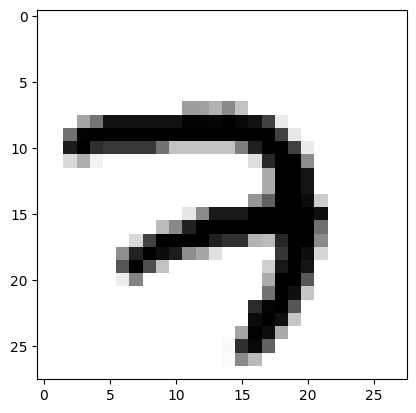

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.imshow(X_train[0], cmap='binary')
plt.show()

In [6]:
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_1 = tf.keras.models.Sequential(LAYERS)

In [7]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model_1.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics='accuracy' )

In [19]:
# training

EPOCHS = 10
VALIDATION_SET = (X_valid, y_valid)

history = model_1.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32)


Epoch 1/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0949 - accuracy: 0.9732 - val_loss: 0.1013 - val_accuracy: 0.9724
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0872 - accuracy: 0.9756 - val_loss: 0.1014 - val_accuracy: 0.9734
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0807 - accuracy: 0.9775 - val_loss: 0.0933 - val_accuracy: 0.9754
Epoch 4/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0751 - accuracy: 0.9794 - val_loss: 0.0887 - val_accuracy: 0.9748
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0695 - accuracy: 0.9810 - val_loss: 0.0860 - val_accuracy: 0.9754
Epoch 6/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0650 - accuracy: 0.9820 - val_loss: 0.0863 - val_accuracy: 0.9750
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0605 - accuracy: 0.9834 - val_loss: 0.0822 - val_accuracy:

In [20]:
no_norm_df=pd.DataFrame(history.history)

In [21]:
#using batch normalization
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_2 = tf.keras.models.Sequential(LAYERS)

In [22]:
model_2.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics='accuracy' )

In [23]:
# training

EPOCHS = 10
VALIDATION_SET = (X_valid, y_valid)

history_2 = model_2.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32)


Epoch 1/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3560 - accuracy: 0.8950 - val_loss: 0.1750 - val_accuracy: 0.9506
Epoch 2/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.1827 - accuracy: 0.9473 - val_loss: 0.1332 - val_accuracy: 0.9602
Epoch 3/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.1418 - accuracy: 0.9578 - val_loss: 0.1144 - val_accuracy: 0.9658
Epoch 4/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.1173 - accuracy: 0.9649 - val_loss: 0.1042 - val_accuracy: 0.9686
Epoch 5/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0967 - accuracy: 0.9713 - val_loss: 0.0992 - val_accuracy: 0.9708
Epoch 6/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0861 - accuracy: 0.9740 - val_loss: 0.0939 - val_accuracy: 0.9724
Epoch 7/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0755 - accuracy: 0.9771 - val_loss: 0.0894 - val_ac

In [24]:
norm_model_df=pd.DataFrame(history_2.history)

In [43]:
norm_model_df

,loss,accuracy,val_loss,val_accuracy
0,0.356005,0.895018,0.175045,0.9506
1,0.182678,0.947327,0.133193,0.9602
2,0.141767,0.957818,0.114425,0.9658
3,0.117252,0.964909,0.104164,0.9686
4,0.096654,0.971327,0.099164,0.9708
5,0.086094,0.974018,0.093933,0.9724
6,0.075506,0.977055,0.089386,0.9748
7,0.066617,0.979764,0.090186,0.9724
8,0.058294,0.982764,0.088636,0.9738
9,0.051707,0.984655,0.087838,0.9750


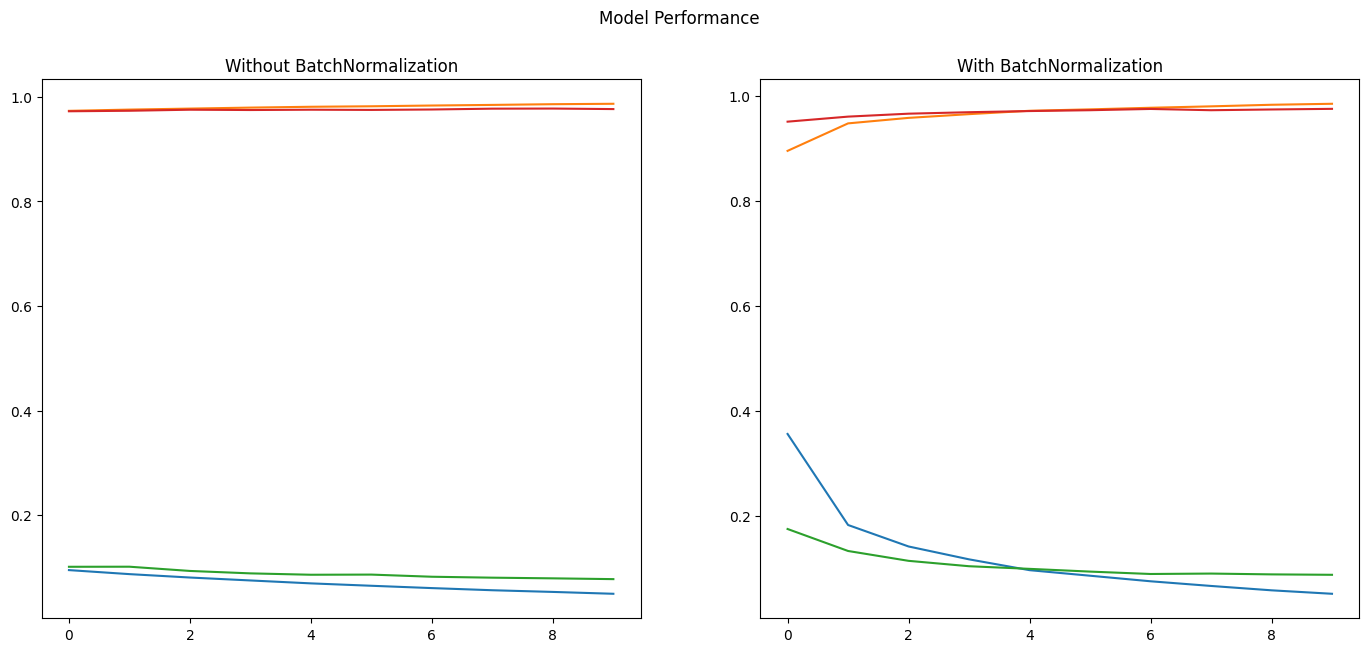

In [39]:
fig=plt.figure(figsize=(17,7))
fig.suptitle('Model Performance')

fig.add_subplot(121)
plt.title('Without BatchNormalization')
plt.plot(no_norm_df)

fig.add_subplot(122)
plt.title('With BatchNormalization')
plt.plot(norm_model_df)


plt.show()

From the above plot, we can conclude that Batch Normalization helps in reducing overfitting


**Q3. Experimentation and Analysis**
1. Experiment with different batch sizes and observe the effect on the training dynamics and model
performance
2. Discuss the advantages and potential limitations of batch normalization in improving the training of
neural networks.

We can experiment with different batch size as follows:



In [46]:

EPOCHS = 5
VALIDATION_SET = (X_valid, y_valid)

#different sizes
sizes = [32, 64, 128, 256]

results = {}

for size in sizes:
    LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

    model = tf.keras.models.Sequential(LAYERS)
    model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics='accuracy' )

    history = model.fit(X_train, y_train, batch_size=size, epochs=EPOCHS,  validation_data=VALIDATION_SET)

    results[size] = pd.DataFrame(history.history)


Epoch 1/5
1719/1719 [==============================] - 13s 7ms/step - loss: 0.3628 - accuracy: 0.8910 - val_loss: 0.1918 - val_accuracy: 0.9454
Epoch 2/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1858 - accuracy: 0.9461 - val_loss: 0.1453 - val_accuracy: 0.9566
Epoch 3/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1420 - accuracy: 0.9590 - val_loss: 0.1264 - val_accuracy: 0.9648
Epoch 4/5
1719/1719 [==============================] - 11s 7ms/step - loss: 0.1145 - accuracy: 0.9666 - val_loss: 0.1138 - val_accuracy: 0.9670
Epoch 5/5
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0964 - accuracy: 0.9715 - val_loss: 0.1071 - val_accuracy: 0.9668
Epoch 1/5
860/860 [==============================] - 8s 8ms/step - loss: 0.4346 - accuracy: 0.8712 - val_loss: 0.2258 - val_accuracy: 0.9368
Epoch 2/5
860/860 [==============================] - 6s 7ms/step - loss: 0.2157 - accuracy: 0.9371 - val_loss: 0.1707 - val_accuracy: 0.950

In [53]:
for i in sizes:
  print(f'For Batch Size {i}')
  print(results[i])
  print()

For Batch Size 32
       loss  accuracy  val_loss  val_accuracy
0  0.362792  0.890964  0.191767        0.9454
1  0.185797  0.946055  0.145289        0.9566
2  0.141955  0.958964  0.126412        0.9648
3  0.114499  0.966582  0.113802        0.9670
4  0.096373  0.971473  0.107125        0.9668

For Batch Size 64
       loss  accuracy  val_loss  val_accuracy
0  0.434633  0.871164  0.225814        0.9368
1  0.215700  0.937073  0.170709        0.9506
2  0.168965  0.951455  0.149129        0.9568
3  0.140308  0.959509  0.132271        0.9612
4  0.120939  0.965691  0.124029        0.9644

For Batch Size 128
       loss  accuracy  val_loss  val_accuracy
0  0.561883  0.834364  0.293693        0.9202
1  0.269372  0.922709  0.227984        0.9364
2  0.212539  0.940109  0.196420        0.9428
3  0.180679  0.948636  0.175963        0.9492
4  0.158135  0.955455  0.162023        0.9522

For Batch Size 256
       loss  accuracy  val_loss  val_accuracy
0  0.775219  0.768909  0.546988        0.8884
1  

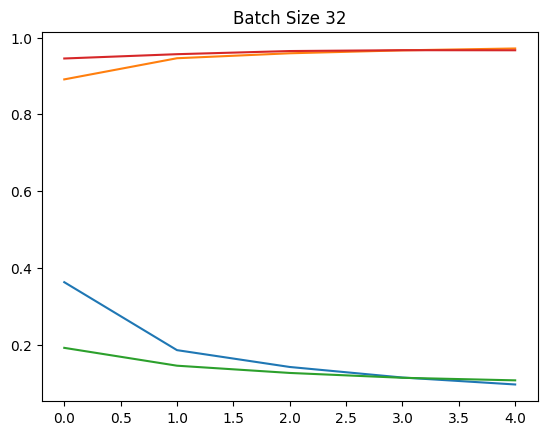

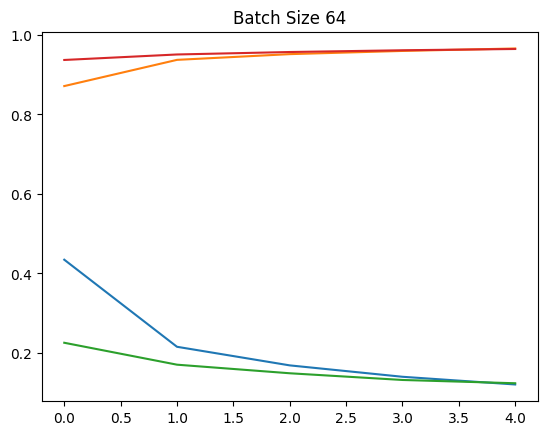

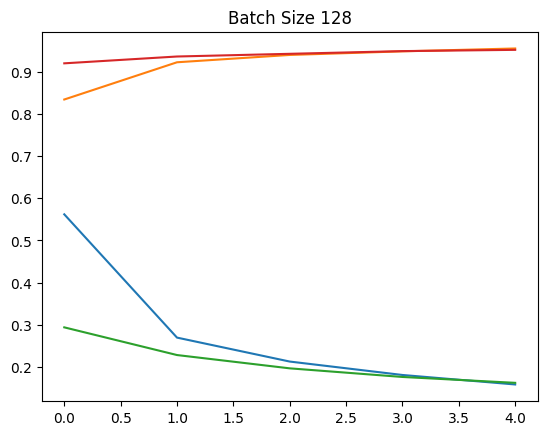

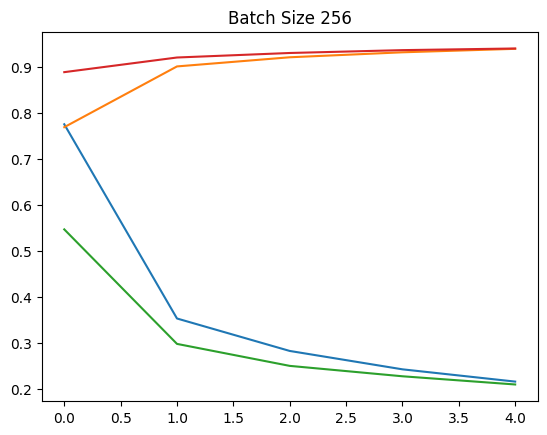

In [60]:

fig.suptitle('Model Performance')

for i, size in enumerate(results):
  fig.add_subplot(2,2,i+1)
  plt.title(f'Batch Size {size}')
  plt.plot(results[size])
  plt.show()

We notice that very large batch size reduces the performance of model

Batch normalization (BatchNorm) offers several advantages for improving the training of neural networks, but it also has potential limitations.

**Advantages of Batch Normalization:**

1. **Faster Convergence:** Batch normalization accelerates training by reducing internal covariate shift. Networks trained with BatchNorm converge faster, requiring fewer epochs to achieve the desired performance.

2. **Stable Learning Rates:** It allows for the use of higher learning rates without the risk of divergence. This can lead to faster convergence and better generalization.

3. **Regularization:** Batch normalization acts as a form of regularization by adding noise to the activations during training. This noise helps prevent overfitting, making the model more robust and generalizable.

4. **Improved Gradient Flow:** It maintains a more consistent gradient flow during backpropagation, reducing the risk of vanishing or exploding gradients in deep networks.

5. **Reduced Sensitivity to Weight Initialization:** Models with BatchNorm are less sensitive to the initial values of their weights, making training more robust.


**Limitations of Batch Normalization:**

1. **Memory and Computational Overhead:** Batch normalization introduces additional operations and memory requirements during training. For large models, this can lead to increased memory usage and computation time.

2. **Inference Mode Inconsistency:** Batch normalization behaves differently during training and inference. During inference, the statistics (mean and standard deviation) used for normalization are typically based on the training data, which can lead to small discrepancies in results.

3. **Batch Size Sensitivity:** The performance of BatchNorm can be sensitive to batch size. Very small batch sizes may not benefit from normalization, and very large batch sizes can slow down training or affect generalization negatively.

4. **Dependency on Mini-Batch Statistics:** BatchNorm relies on statistics computed from mini-batches, which can be noisy, especially in small batches. This noise may affect training and generalization.

5. **Non-Sequential Models:** Batch normalization is more challenging to apply in non-sequential models, such as recurrent neural networks (RNNs), and may require adaptations like Layer Normalization or Group Normalization.

6. **Complex Hyperparameter Tuning:** To optimize the performance of a model with BatchNorm, you might need to tune additional hyperparameters, like learning rates or the weight decay parameter.
